In [2]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import pandas as pd
plt.rcParams['figure.figsize'] = (10.0, 8.0)

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [257]:
alcaldes = pd.read_excel("Resultados_Elecciones_Alcaldes_2004_al_2012.xlsx")

In [42]:
def process_alianza_alcaldes(porcentaje=False):
    #Read DF
    alcaldes = pd.read_excel("Resultados_Elecciones_Alcaldes_2004_al_2012.xlsx")
    #Select only votos por partido en cada eleccion
    
    if porcentaje:
        alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum() /alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum()
    else:
        alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    alc_ano = alc_ano.reset_index()
    # Select only RN y UDI
    alianza_alc = alc_ano[alc_ano["Sigla Partido"].isin(["RN", "UDI", "U.D.I.", "R.N."])]
    
    #Change bad encoded party names
    alianza_alc.replace(to_replace="R.N.", value="RN", inplace=True)
    alianza_alc.replace(to_replace="U.D.I.", value="UDI", inplace=True)
    
    #Pivot!
    alianza = alianza_alc.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")
    if porcentaje:
        title = "Porcentaje Votos en Elecciones Alcaldes Alianza"
        xlim = [2002, 2014]
        ylim = [0, 0.20]
        ylabel = "% de Votos"
        copyr = 0
    else:
        title = "Total Votos en Elecciones Alcaldes Alianza"
        xlim = [2002, 2014]
        ylim = [0, 1600000]
        ylabel = "Total de Votos"
        copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2013,copyr,"@slarrain")
    ax.set(ylabel=ylabel)
    return ax

In [67]:
def process_alianza_concejales(porcentaje=False):
    #Read DF
    alcaldes = pd.read_excel("resultados_elecciones_concejales_2004_al_2012.xlsx")
    #Select only votos por partido en cada eleccion
    
    if porcentaje:
        alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum() / alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum()
    else:
        alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    alc_ano = alc_ano.reset_index()
    # Select only RN y UDI
    alianza_alc = alc_ano[alc_ano["Sigla Partido"].isin(["RN", "UDI", "U.D.I.", "R.N."])]
    
    #Change bad encoded party names
    alianza_alc.replace(to_replace="R.N.", value="RN", inplace=True)
    alianza_alc.replace(to_replace="U.D.I.", value="UDI", inplace=True)
    
    alianza_ = alianza_alc.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    alianza_ = alianza_.reset_index()
    
    #Pivot!
    alianza = alianza_.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")
    if porcentaje:
        title = "Porcentaje en Elecciones Concejales Alianza"
        xlim = [2002, 2014]
        ylim = [0, 0.20]
        ylabel = "% de Votos"
        copyr = 0
    else:
        title = "Total Votos en Elecciones Concejales Alianza"
        xlim = [2002, 2014]
        ylim = [0, 1600000]
        ylabel = "Total de Votos"
        copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2013,copyr,"@slarrain")
    ax.set(ylabel=ylabel)
    return ax

In [324]:
def process_todos_alcaldes():
    #Read DF
    alcaldes = pd.read_excel("Resultados_Elecciones_Alcaldes_2004_al_2012.xlsx")
    #Select only votos por partido en cada eleccion
    alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    alc_ano = alc_ano.reset_index()
    alc_ano.loc[:, "Sigla Partido"].replace(to_replace="[\.]", value="", regex=True, inplace=True)
    alc_ano.replace(to_replace="PCCH", value="PCCh", inplace=True)
    
    alcaldes_grandes = alc_ano[alc_ano["Sigla Partido"].isin(["RN", "UDI", "PDC", "PPD", "PRSD", "PS", "PCCh"])]
    
    alc = alcaldes_grandes.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")
    return alc
    plt.figure()
    ax = alc.plot(xticks=[2004, 2008, 2012], title="Votos Elecciones Alcaldes por Partido", 
                  xlim=[2002, 2014], ylim=[0, 1600000])
    ax.text(2013,10000,"@slarrain")
    return ax
    

In [132]:
def rn_udi(df):
    df = df[df["Sigla Partido"].isin(["RN", "UDI", "U.D.I.", "R.N."])]
    df.replace(to_replace="R.N.", value="RN", inplace=True)
    df.replace(to_replace="U.D.I.", value="UDI", inplace=True)
    return df

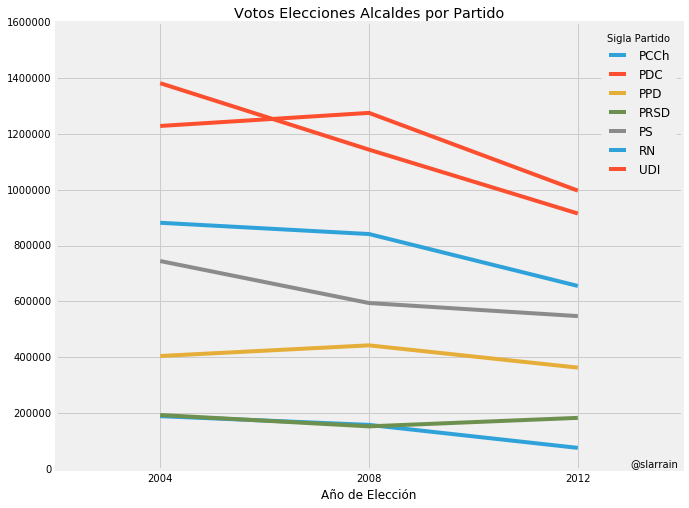

In [18]:
process_todos_alcaldes()

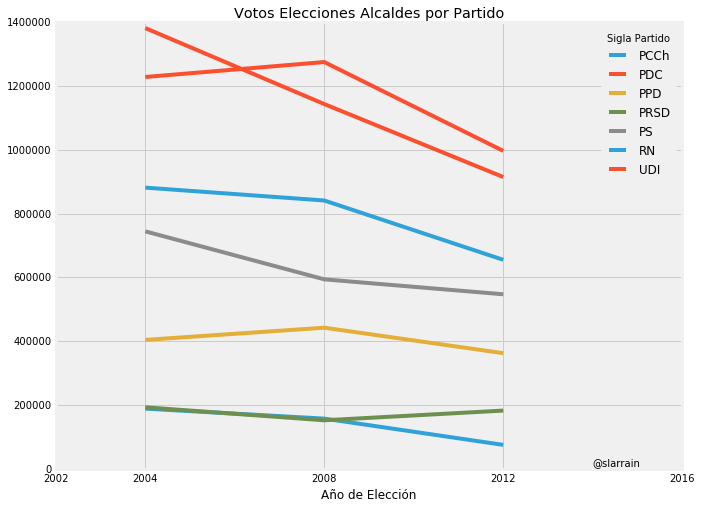

In [5]:
process_todos_alcaldes()

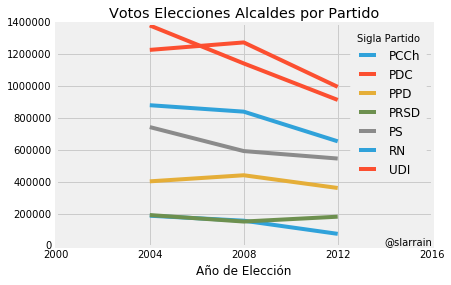

In [3]:
process_todos_alcaldes()

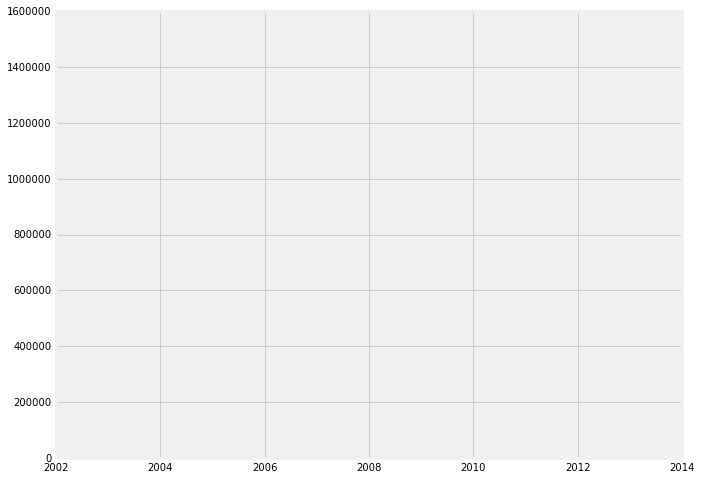

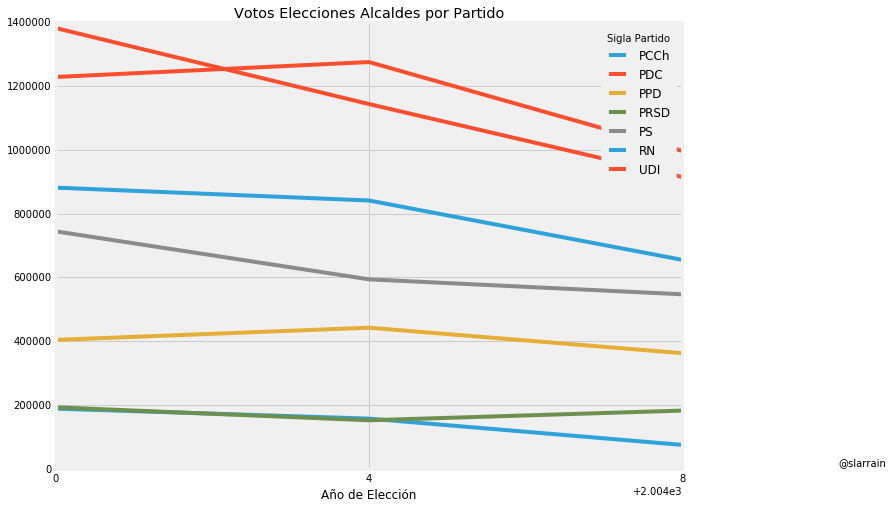

In [14]:
fig = process_todos_alcaldes()

In [10]:
f.

matplotlib.figure.Figure

(2002, 2014)

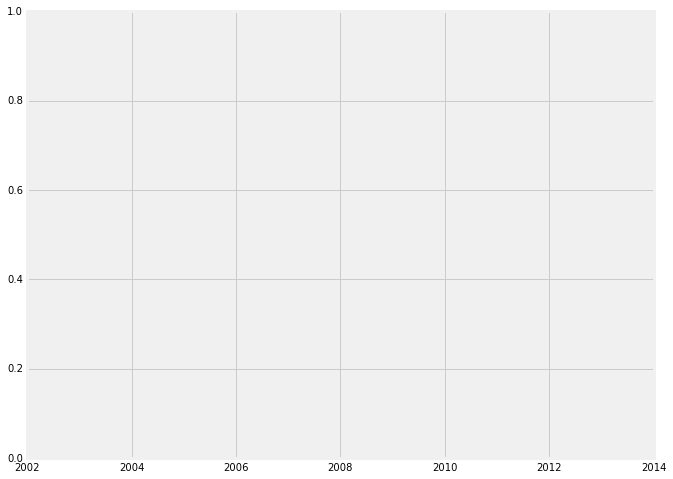

In [11]:
f.axes.

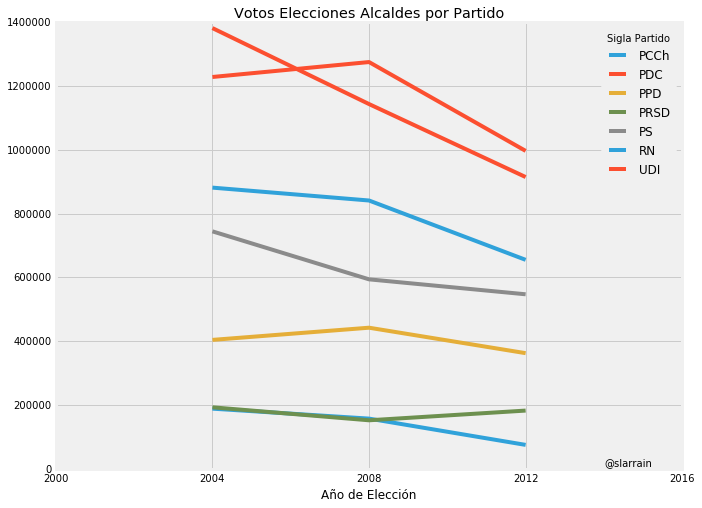

In [3]:
fig = process_todos_alcaldes()

In [8]:
f = fig.get_figure()

In [11]:
f.savefig("test2.png")

In [3]:
alcaldes = pd.read_excel("Resultados_Elecciones_Alcaldes_2004_al_2012.xlsx")

In [4]:
alcaldes.head()

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Id Región,Región,Circunscripción Senatorial,...,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Partido,Sigla Partido,Lista,Votos Totales
0,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CUADRA SALDIAS BRUNILDA,BRUNILDA MARIA,CUADRA,SALDIAS,MUJER,NO,COMUNISTA DE CHILE,PCCH,A,97
1,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ORTEGA CASTILLO HERNAN,HERNAN FRANCISCO,ORTEGA,CASTILLO,HOMBRE,NO,SOCIALISTA DE CHILE,PS,C,1077
2,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,MACCHIAVELLO ZEREGA MARIA INES,MARIA INES,MACCHIAVELLO,ZEREGA,MUJER,NO,INDEPENDIENTE,IND,E,1456
3,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,GALLEGUILLOS CASTILLO RAMON,RAMON ERNESTO,GALLEGUILLOS,CASTILLO,HOMBRE,SI,UNION DEMOCRATA INDEPENDIENTE,UDI,B,1627
4,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SAMIT VICENCIO ANDRES,ANDRES JOSE,SAMIT,VICENCIO,HOMBRE,NO,INDEPENDIENTE,IND,CI,47


In [67]:
alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()

In [20]:
alcaldes.groupby(["Año de Elección", "Sigla Partido"]).get_group(("", "RN"))['Votos Totales'].sum()

KeyError: ('', 'RN')

In [7]:
alcaldes.groupby(["Año de Elección", "Sigla Partido"]).filter(lambda x: x["Sigla Partido"] == "RN")

TypeError: filter function returned a Series, but expected a scalar bool

In [89]:
alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
alc_ano = alc_ano.reset_index()

df3.loc[:,'ticket_amount'].replace({',':'.'}, regex=True, inplace=True)

In [90]:
type(alc_ano)

pandas.core.frame.DataFrame

In [91]:
alc_ano.loc[:, "Sigla Partido"].replace(to_replace="[\.]", value="", regex=True, inplace=True)

In [95]:
alcaldes_todos = alc_ano

In [83]:
alcaldes_todos = alc_ano.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")

In [96]:
alcaldes_todos.replace(to_replace="PCCH", value="PCCh", inplace=True)

In [108]:
alcaldes_grandes = alcaldes_todos[alcaldes_todos["Sigla Partido"].isin(["RN", "UDI", "PDC", "PPD", "PRSD", "PS", "PCCh"])]

In [109]:
alc = alcaldes_grandes.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")

<IPython.core.display.Javascript object>


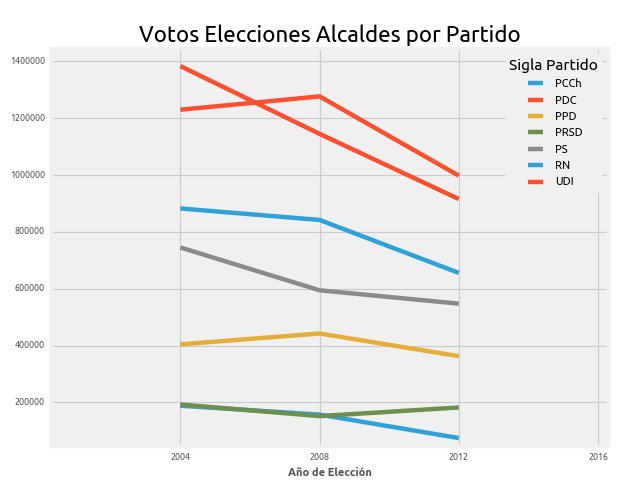

In [154]:
ax = alc.plot(xticks=[2000, 2004, 2008, 2012, 2016], title="Votos Elecciones Alcaldes por Partido", )

<IPython.core.display.Javascript object>


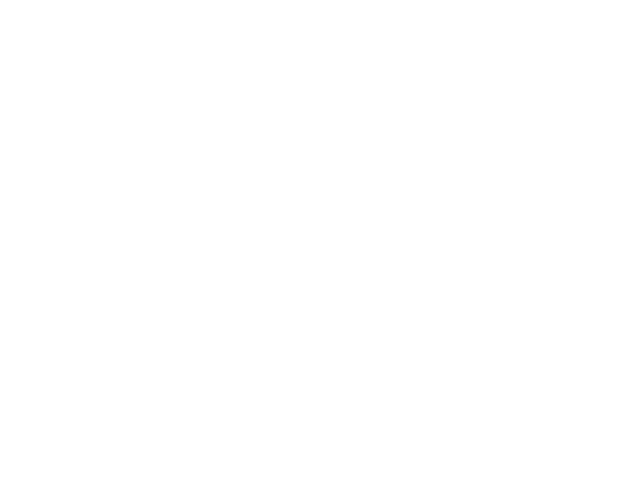

<IPython.core.display.Javascript object>


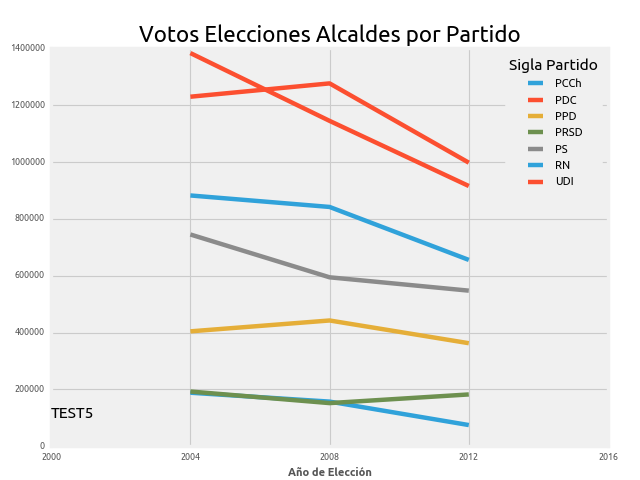

In [171]:
plt.figure()
ax = alc.plot(xticks=[2000, 2004, 2008, 2012, 2016], title="Votos Elecciones Alcaldes por Partido", )
ax.text(2000,100000,"TEST5")
ax.figure.text(2000, 110000, "TEST6")

In [136]:
plt.figtext(0,0, "@slarrain")

In [143]:
ax.get_figure().text(0,0,"test")

In [146]:
ax.figure.text(0, 0, "TEST")

In [148]:
ax.text(0, 0, "TEST3")

In [151]:
plt.show(ax)

In [153]:
%matplotlib notebook

In [112]:
>>> print(plt.style.available)

['seaborn-poster', 'seaborn-pastel', 'seaborn-notebook', 'seaborn-colorblind', 'seaborn-ticks', 'seaborn-talk', 'classic', 'seaborn-dark-palette', 'seaborn-darkgrid', 'grayscale', 'seaborn-deep', 'dark_background', 'ggplot', 'seaborn-muted', 'seaborn-bright', 'seaborn-whitegrid', 'seaborn-paper', 'bmh', 'seaborn-dark', 'fivethirtyeight', 'seaborn-white']


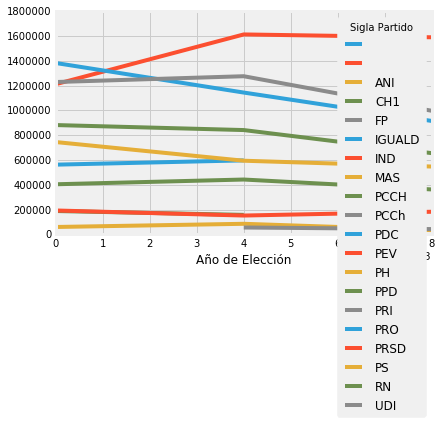

In [86]:
alcaldes_todos.plot()

In [16]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
concejales = pd.read_excel("resultados_elecciones_concejales_2004_al_2012.xlsx")

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


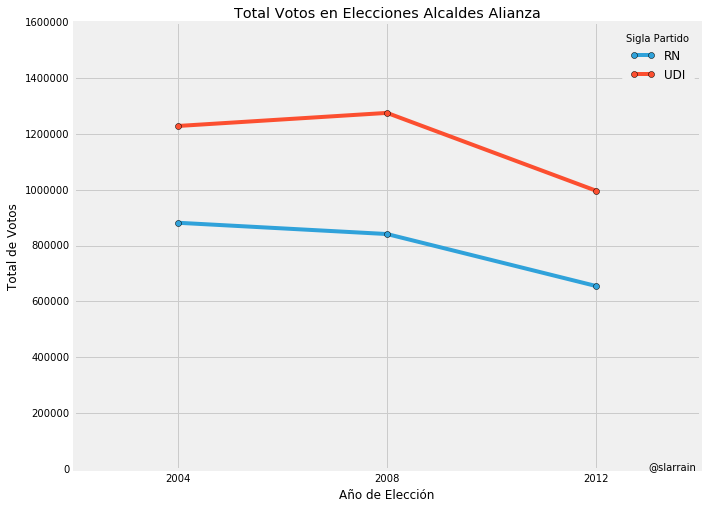

In [35]:
alc = process_alianza_alcaldes()

In [36]:
alc.get_figure().savefig("votos_alcaldes_alianza.png")

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


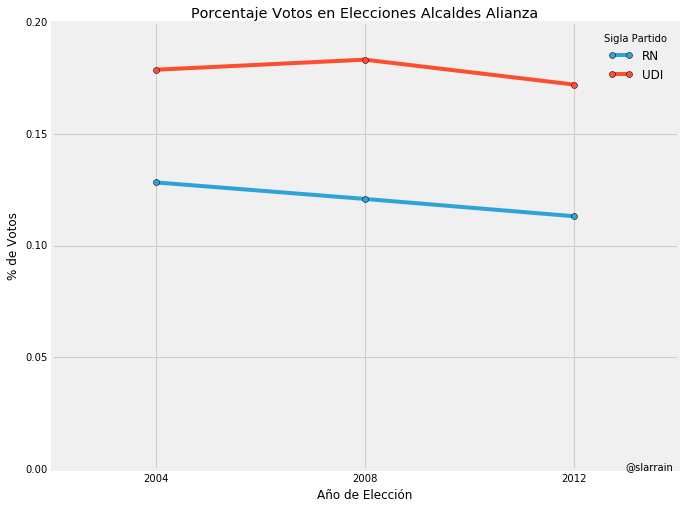

In [44]:
alc = process_alianza_alcaldes(True)

In [46]:
alc.get_figure().savefig("porcentaje_alcaldes_alianza.png")

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


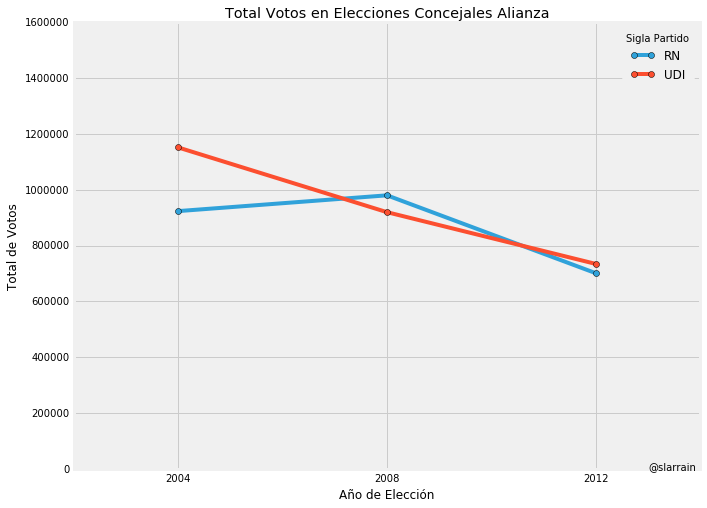

In [63]:
con = process_alianza_concejales()

In [64]:
con.get_figure().savefig("votos_concejales_alianza.png")

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


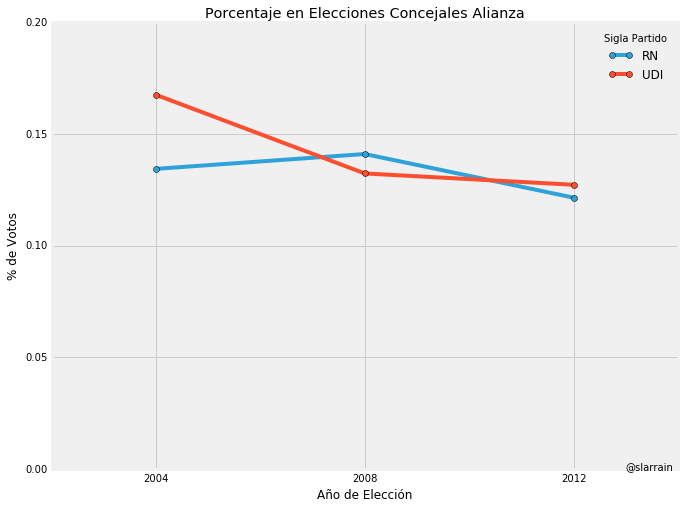

In [68]:
con = process_alianza_concejales(True)

In [69]:
con.get_figure().savefig("porcentaje_concejales_alianza.png")

In [73]:
alcaldes.head(25)

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Id Región,Región,Circunscripción Senatorial,...,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Partido,Sigla Partido,Lista,Votos Totales
0,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CUADRA SALDIAS BRUNILDA,BRUNILDA MARIA,CUADRA,SALDIAS,MUJER,NO,COMUNISTA DE CHILE,PCCH,A,97
1,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ORTEGA CASTILLO HERNAN,HERNAN FRANCISCO,ORTEGA,CASTILLO,HOMBRE,NO,SOCIALISTA DE CHILE,PS,C,1077
2,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,MACCHIAVELLO ZEREGA MARIA INES,MARIA INES,MACCHIAVELLO,ZEREGA,MUJER,NO,INDEPENDIENTE,IND,E,1456
3,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,GALLEGUILLOS CASTILLO RAMON,RAMON ERNESTO,GALLEGUILLOS,CASTILLO,HOMBRE,SI,UNION DEMOCRATA INDEPENDIENTE,UDI,B,1627
4,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SAMIT VICENCIO ANDRES,ANDRES JOSE,SAMIT,VICENCIO,HOMBRE,NO,INDEPENDIENTE,IND,CI,47
5,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ULLOA CONTRERAS RICARDO ALEX,RICARDO ALEX,ULLOA,CONTRERAS,HOMBRE,NO,INDEPENDIENTE,IND,CI,30
6,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,VOTOS EN BLANCO,,,,NaN,,,,,103
7,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,VOTOS NULOS,,,,NaN,,,,,169
8,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CUADRA SALDIAS BRUNILDA,BRUNILDA MARIA,CUADRA,SALDIAS,MUJER,NO,COMUNISTA DE CHILE,PCCH,A,75
9,MUNICIPALES,ALCALDE,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ORTEGA CASTILLO HERNAN,HERNAN FRANCISCO,ORTEGA,CASTILLO,HOMBRE,NO,SOCIALISTA DE CHILE,PS,C,1461


In [ ]:
alc_electos = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum() /alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum()

In [124]:
alc_electos = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].count())

In [128]:
alc_el = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido", "Electo"])['Cargo'].count())

In [130]:
alc_el = alc_el.reset_index()

In [126]:
alc_electos = alc_electos.reset_index()

In [134]:
alc_el

,Año de Elección,Sigla Partido,Electo,Cargo
15,2004,RN,NO,264
16,2004,RN,SI,114
17,2004,UDI,NO,302
18,2004,UDI,SI,168
36,2008,RN,NO,208
37,2008,RN,SI,176
38,2008,UDI,NO,236
39,2008,UDI,SI,200
63,2012,RN,NO,77
64,2012,RN,SI,41


In [164]:
alc_electos

,Año de Elección,Sigla Partido,Cargo
0,2004,RN,378
1,2004,UDI,470
2,2008,RN,384
3,2008,UDI,436
4,2012,RN,118
5,2012,UDI,131


In [133]:
alc_el = rn_udi(alc_el)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [135]:
alc_electos = rn_udi(alc_electos)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [163]:
alc_electos.reset_index(drop=True, inplace=True)

In [155]:
alcaldes_si = alc_el[alc_el.Electo == "SI"].loc[:, ["Año de Elección", "Sigla Partido", "Cargo"]]

In [157]:
alcaldes_si.reset_index(inplace=True)

In [159]:
alcaldes_si.drop("index", axis=1, inplace=True)

In [173]:
alcal = alcaldes_si.copy()

In [174]:
alcal['Cargo'] = alcal['Cargo'] / alc_electos['Cargo']

In [175]:
alcal

,Año de Elección,Sigla Partido,Cargo
0,2004,RN,0.301587
1,2004,UDI,0.357447
2,2008,RN,0.458333
3,2008,UDI,0.458716
4,2012,RN,0.347458
5,2012,UDI,0.358779


In [176]:
def candidatos_alcalde_alianza(alcaldes):
    alc_electos = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].count())
    alc_el = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido", "Electo"])['Cargo'].count())
    
    alc_el = alc_el.reset_index()
    alc_electos = alc_electos.reset_index()
    
    alc_el = rn_udi(alc_el)
    alc_electos = rn_udi(alc_electos)
    
    alc_electos.reset_index(drop=True, inplace=True)
    
    alcaldes_si = alc_el[alc_el.Electo == "SI"].loc[:, ["Año de Elección", "Sigla Partido", "Cargo"]]
    
    alcaldes_si.reset_index(inplace=True, drop=True)
    
    alcal = alcaldes_si.copy()
    alcal['Cargo'] = alcal['Cargo'] / alc_electos['Cargo']
    
    return alcal

In [178]:
a = candidatos_alcalde_alianza(alcaldes)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [179]:
a

,Año de Elección,Sigla Partido,Cargo
0,2004,RN,0.301587
1,2004,UDI,0.357447
2,2008,RN,0.458333
3,2008,UDI,0.458716
4,2012,RN,0.347458
5,2012,UDI,0.358779


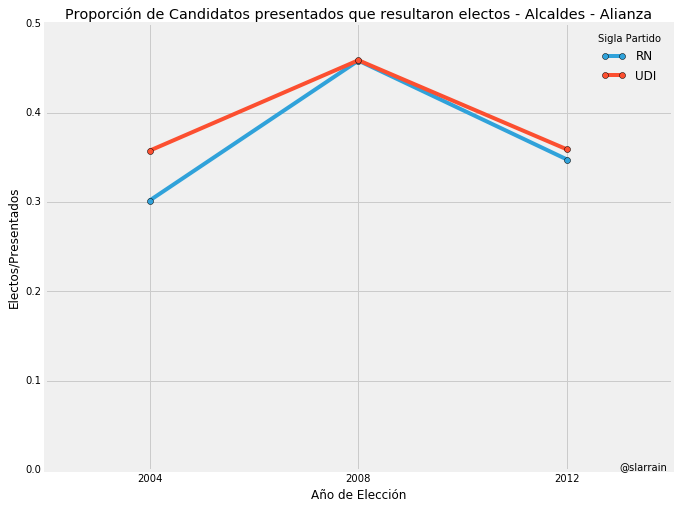

In [180]:
    alianza = a.pivot(index="Año de Elección", columns="Sigla Partido", values="Cargo")
    title = "Proporción de Candidatos presentados que resultaron electos - Alcaldes - Alianza"
    xlim = [2002, 2014]
    ylim = [0, 0.50]
    ylabel = "Electos/Presentados"
    copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2013,copyr,"@slarrain")
    ax.set(ylabel=ylabel)


In [181]:
ax.get_figure().savefig("proporcion_electos_alcaldes_alianza.png")

In [183]:
alcaldes = pd.read_excel("resultados_elecciones_concejales_2004_al_2012.xlsx")

In [185]:
concejales.head()

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Id Región,Región,Circunscripción Senatorial,...,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Partido,Sigla Partido,Lista,Votos Totales
0,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SIMIAN DIAZ LUIS ALBERTO,LUIS ALBERTO,SIMIAN,DIAZ,HOMBRE,NO,INDEPENDIENTE,IND,B,115
1,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,KERN AVILA FRESIA DEL CARMEN,FRESIA DEL CARMEN,KERN,AVILA,MUJER,NO,DEMOCRATA CRISTIANO,PDC,C,156
2,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,BRETON FISHER FRANCISCO AMADOR,FRANCISCO AMADOR,BRETON,FISHER,HOMBRE,NO,INDEPENDIENTE,IND,E,46
3,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ACOSTA MILLAN ELISA,ELISA DEL CARMEN,ACOSTA,MILLAN,MUJER,NO,UNION DEMOCRATA INDEPENDIENTE,UDI,B,85
4,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,PEREZ HERRERA ROSA,ROSA ANGELICA,PEREZ,HERRERA,MUJER,SI,DEMOCRATA CRISTIANO,PDC,C,315


In [186]:
candidatos_alcalde_alianza(concejales)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Año de Elección,Sigla Partido,Cargo
0,2004,RN,0.418283
1,2004,UDI,0.438385
2,2008,RN,0.469446
3,2008,UDI,0.408964
4,2012,RN,0.392157
5,2012,RN,0.500000
6,2012,UDI,0.433333
7,2012,UDI,0.333333


In [187]:
def test(alcaldes):
    alc_electos = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].count())
    alc_el = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido", "Electo"])['Cargo'].count())
    
    alc_el = alc_el.reset_index()
    alc_electos = alc_electos.reset_index()
    
    alc_el = rn_udi(alc_el)
    alc_electos = rn_udi(alc_electos)
    
    alc_electos.reset_index(drop=True, inplace=True)
    
    alcaldes_si = alc_el[alc_el.Electo == "SI"].loc[:, ["Año de Elección", "Sigla Partido", "Cargo"]]
    
    alcaldes_si.reset_index(inplace=True, drop=True)
    
    return alcaldes_si, alc_electos
    alcal = alcaldes_si.copy()
    alcal['Cargo'] = alcal['Cargo'] / alc_electos['Cargo']
    
    return alcal

In [188]:
con_si, con = test(concejales)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [189]:
con_si

,Año de Elección,Sigla Partido,Cargo
0,2004,RN,1208
1,2004,UDI,1238
2,2008,RN,1306
3,2008,UDI,1168
4,2012,RN,320
5,2012,RN,1
6,2012,UDI,351
7,2012,UDI,1


In [190]:
con

,Año de Elección,Sigla Partido,Cargo
0,2004,RN,2888
1,2004,UDI,2824
2,2008,RN,2782
3,2008,UDI,2856
4,2012,RN,816
5,2012,RN,2
6,2012,UDI,810
7,2012,UDI,3


In [192]:
    con_si = pd.DataFrame(con_si.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].sum())
    con_si.reset_index(inplace=True)

In [193]:
con_si

,Año de Elección,Sigla Partido,Cargo
0,2004,RN,1208
1,2004,UDI,1238
2,2008,RN,1306
3,2008,UDI,1168
4,2012,RN,321
5,2012,UDI,352


In [194]:
def candidatos_concejales_alianza(alcaldes):
    alc_electos = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].count())
    alc_el = pd.DataFrame(alcaldes.groupby(["Año de Elección", "Sigla Partido", "Electo"])['Cargo'].count())
    
    alc_el = alc_el.reset_index()
    alc_electos = alc_electos.reset_index()
    
    alc_el = rn_udi(alc_el)
    alc_electos = rn_udi(alc_electos)
    
    alc_electos.reset_index(drop=True, inplace=True)
    
    alcaldes_si = alc_el[alc_el.Electo == "SI"].loc[:, ["Año de Elección", "Sigla Partido", "Cargo"]]
    
    alcaldes_si.reset_index(inplace=True, drop=True)
    
    #Bug with doble partido en 2012
    alcaldes_si = pd.DataFrame(alcaldes_si.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].sum())
    alcaldes_si.reset_index(inplace=True)
    
    alc_electos = pd.DataFrame(alc_electos.groupby(["Año de Elección", "Sigla Partido"])['Cargo'].sum())
    alc_electos.reset_index(inplace=True)
    
    
    alcal = alcaldes_si.copy()
    alcal['Cargo'] = alcal['Cargo'] / alc_electos['Cargo']
    
    return alcal

In [197]:
a = candidatos_concejales_alianza(concejales)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


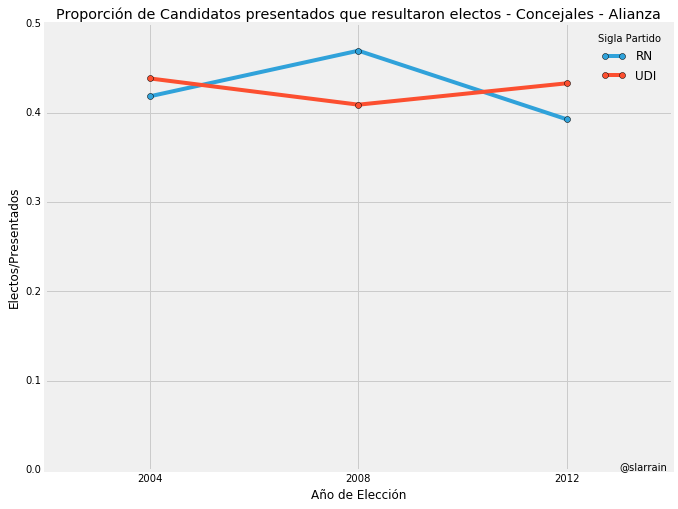

In [198]:
    alianza = a.pivot(index="Año de Elección", columns="Sigla Partido", values="Cargo")
    title = "Proporción de Candidatos presentados que resultaron electos - Concejales - Alianza"
    xlim = [2002, 2014]
    ylim = [0, 0.50]
    ylabel = "Electos/Presentados"
    copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2013,copyr,"@slarrain")
    ax.set(ylabel=ylabel)

In [199]:
ax.get_figure().savefig("proporcion_electos_concejales_alianza.png")

In [200]:
alcaldes

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Id Región,Región,Circunscripción Senatorial,...,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Partido,Sigla Partido,Lista,Votos Totales
0,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SIMIAN DIAZ LUIS ALBERTO,LUIS ALBERTO,SIMIAN,DIAZ,HOMBRE,NO,INDEPENDIENTE,IND,B,115
1,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,KERN AVILA FRESIA DEL CARMEN,FRESIA DEL CARMEN,KERN,AVILA,MUJER,NO,DEMOCRATA CRISTIANO,PDC,C,156
2,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,BRETON FISHER FRANCISCO AMADOR,FRANCISCO AMADOR,BRETON,FISHER,HOMBRE,NO,INDEPENDIENTE,IND,E,46
3,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ACOSTA MILLAN ELISA,ELISA DEL CARMEN,ACOSTA,MILLAN,MUJER,NO,UNION DEMOCRATA INDEPENDIENTE,UDI,B,85
4,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,PEREZ HERRERA ROSA,ROSA ANGELICA,PEREZ,HERRERA,MUJER,SI,DEMOCRATA CRISTIANO,PDC,C,315
5,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,REYES ASTUDILLO SERGIO,JOSE SERGIO,REYES,ASTUDILLO,HOMBRE,SI,POR LA DEMOCRACIA,PPD,C,283
6,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CISTERNAS FLORES PEDRO,PEDRO ARMANDO,CISTERNAS,FLORES,HOMBRE,NO,COMUNISTA DE CHILE,PCCH,A,82
7,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SEPULVEDA VELASQUEZ MARIA MARGARITA LORE,MARIA MARGARITA,SEPULVEDA,VELASQUEZ,MUJER,NO,DE ACCION REGIONALISTA DE CHILE,PAR,E,86
8,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,TORDOYA RAMIREZ JAIME,RAUL JAIME,TORDOYA,RAMIREZ,HOMBRE,NO,RENOVACION NACIONAL,RN,B,48
9,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CONTRERAS BECERRA CLAUDIO,CLAUDIO DEMETRIO,CONTRERAS,BECERRA,HOMBRE,NO,INDEPENDIENTE,IND,E,112


In [ ]:
rn = b, e, h
ps = c,c, f
dc = c, c, f
ppd = c, f, e
pcch = a, d, e
Alianza = {2002: b, 2008: e, 2012:h}
NM = {2002:c, 2008:[c, f], 2012:[f, e]}

In [253]:
alcaldes = concejales

In [258]:
alc_ano = alcaldes.groupby(["Año de Elección", "Lista"])['Votos Totales'].sum() / alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum()

In [260]:
alc_ano = alc_ano.reset_index()

In [262]:
alc_ano.groupby(["Año de Elección"])['Votos Totales'].sum()

Año de Elección
2004    1.0
2008    1.0
2012    1.0
Name: Votos Totales, dtype: float64

In [236]:
alc_ano.loc[alc_ano["Año de Elección"]==2004, "Lista"] = alc_ano.loc[alc_ano["Año de Elección"]==2004, "Lista"].map({"B":"Alianza", "C":"Nueva Mayoría"})

In [237]:
alc_ano.loc[alc_ano["Año de Elección"]==2008, "Lista"] = alc_ano.loc[alc_ano["Año de Elección"]==2008, "Lista"].map({"E":"Alianza", "C":"Nueva Mayoría", "F":"Nueva Mayoría"})

In [238]:
alc_ano.loc[alc_ano["Año de Elección"]==2012, "Lista"] = alc_ano.loc[alc_ano["Año de Elección"]==2012, "Lista"].map({"H":"Alianza", "E":"Nueva Mayoría", "F":"Nueva Mayoría"})

In [239]:
alc = alc_ano.groupby(["Año de Elección", "Lista"], as_index=False)['Votos Totales'].sum()

In [240]:
alc_ano.dropna(inplace=True)

In [255]:
alcaldes

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Id Región,Región,Circunscripción Senatorial,...,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo,Partido,Sigla Partido,Lista,Votos Totales
0,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SIMIAN DIAZ LUIS ALBERTO,LUIS ALBERTO,SIMIAN,DIAZ,HOMBRE,NO,INDEPENDIENTE,IND,B,115
1,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,KERN AVILA FRESIA DEL CARMEN,FRESIA DEL CARMEN,KERN,AVILA,MUJER,NO,DEMOCRATA CRISTIANO,PDC,C,156
2,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,BRETON FISHER FRANCISCO AMADOR,FRANCISCO AMADOR,BRETON,FISHER,HOMBRE,NO,INDEPENDIENTE,IND,E,46
3,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,ACOSTA MILLAN ELISA,ELISA DEL CARMEN,ACOSTA,MILLAN,MUJER,NO,UNION DEMOCRATA INDEPENDIENTE,UDI,B,85
4,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,PEREZ HERRERA ROSA,ROSA ANGELICA,PEREZ,HERRERA,MUJER,SI,DEMOCRATA CRISTIANO,PDC,C,315
5,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,REYES ASTUDILLO SERGIO,JOSE SERGIO,REYES,ASTUDILLO,HOMBRE,SI,POR LA DEMOCRACIA,PPD,C,283
6,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CISTERNAS FLORES PEDRO,PEDRO ARMANDO,CISTERNAS,FLORES,HOMBRE,NO,COMUNISTA DE CHILE,PCCH,A,82
7,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,SEPULVEDA VELASQUEZ MARIA MARGARITA LORE,MARIA MARGARITA,SEPULVEDA,VELASQUEZ,MUJER,NO,DE ACCION REGIONALISTA DE CHILE,PAR,E,86
8,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,TORDOYA RAMIREZ JAIME,RAUL JAIME,TORDOYA,RAMIREZ,HOMBRE,NO,RENOVACION NACIONAL,RN,B,48
9,MUNICIPALES,CONCEJAL,2004-10-31,2004,2004,2008,2004-2008,1,DE TARAPACA,1,...,CONTRERAS BECERRA CLAUDIO,CLAUDIO DEMETRIO,CONTRERAS,BECERRA,HOMBRE,NO,INDEPENDIENTE,IND,E,112


In [272]:
def votos_alcalde_coalicion(alcaldes, porcentaje=False):
    if porcentaje:
        alc_ano = alcaldes.groupby(["Año de Elección", "Lista"])['Votos Totales'].sum() / alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum()
        alc_ano = alc_ano.reset_index()
    else:
        alc_ano = alcaldes.groupby(["Año de Elección", "Lista"], as_index=False)['Votos Totales'].sum()
    alc_ano.loc[alc_ano["Año de Elección"]==2004, "Lista"] = alc_ano.loc[alc_ano["Año de Elección"]==2004, "Lista"].map({"B":"Alianza", "C":"Nueva Mayoría"})
    alc_ano.loc[alc_ano["Año de Elección"]==2008, "Lista"] = alc_ano.loc[alc_ano["Año de Elección"]==2008, "Lista"].map({"E":"Alianza", "C":"Nueva Mayoría", "F":"Nueva Mayoría"})
    alc_ano.loc[alc_ano["Año de Elección"]==2012, "Lista"] = alc_ano.loc[alc_ano["Año de Elección"]==2012, "Lista"].map({"H":"Alianza", "E":"Nueva Mayoría", "F":"Nueva Mayoría"})
    alc = alc_ano.groupby(["Año de Elección", "Lista"], as_index=False)['Votos Totales'].sum()
    alc.dropna(inplace=True)
    
    return alc
    
def graph_votos_alcalde_coalicion(a):
    alianza = a.pivot(index="Año de Elección", columns="Lista", values="Votos Totales")
    title = "Total de Votos por Coalición - Alcaldes"
    xlim = [2002, 2014]
    ylim = [0, 3200000]
    ylabel = "Total votos"
    copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2013,copyr,"@slarrain")
    ax.set(ylabel=ylabel)
    return ax
    
def graph_porcentaje_alcalde_coalicion(a):
    alianza = a.pivot(index="Año de Elección", columns="Lista", values="Votos Totales")
    title = "Porcentaje total de Votos por Coalición - Alcaldes"
    xlim = [2002, 2014]
    ylim = [0, 0.5]
    ylabel = "Porcentaje votos"
    copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2013,copyr,"@slarrain")
    ax.set(ylabel=ylabel)
    return ax

In [283]:
df = votos_alcalde_coalicion(alcaldes, True)

In [284]:
df

,Año de Elección,Lista,Votos Totales
0,2004,Alianza,0.355521
1,2004,Nueva Mayoría,0.411414
2,2008,Alianza,0.371713
3,2008,Nueva Mayoría,0.351407
4,2012,Alianza,0.359023
5,2012,Nueva Mayoría,0.411306


In [280]:
df

,Año de Elección,Lista,Votos Totales
0,2004,Alianza,2443381
1,2004,Nueva Mayoría,2827516
2,2008,Alianza,2586754
3,2008,Nueva Mayoría,2445447
4,2012,Alianza,2079073
5,2012,Nueva Mayoría,2381836


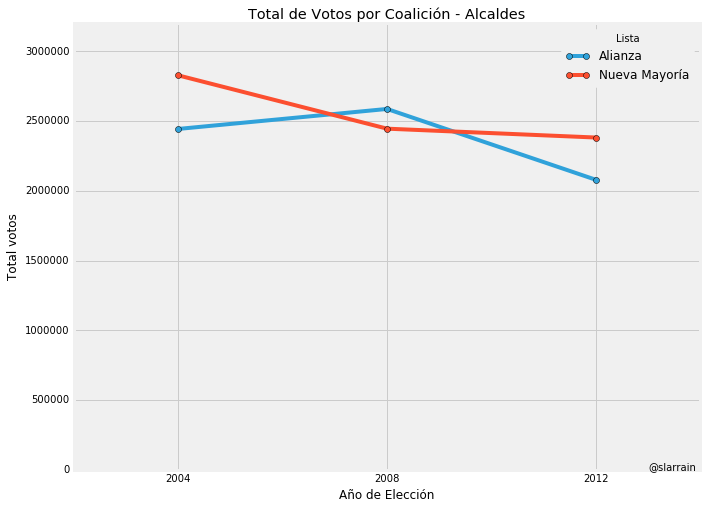

In [281]:
ax = graph_votos_alcalde_coalicion(df)

In [282]:
ax.get_figure().savefig("votos_alcaldes_coalicion.png")

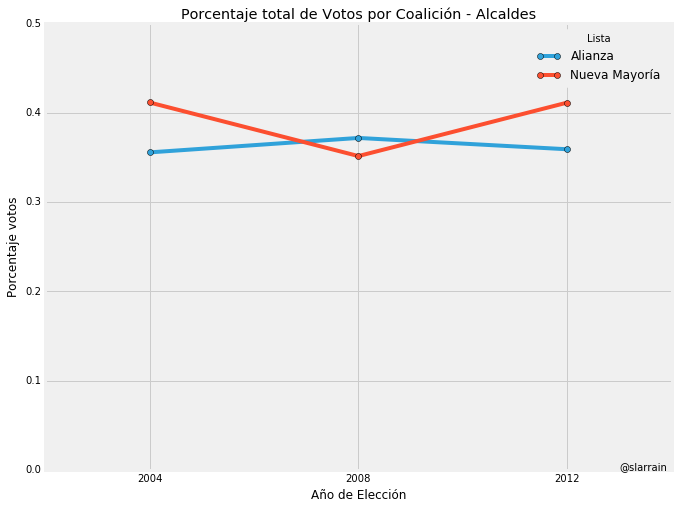

In [277]:
ax = graph_porcentaje_alcalde_coalicion(df)

In [278]:
ax.get_figure().savefig("porcentaje_alcaldes_coalicion.png")

In [285]:
df

,Año de Elección,Lista,Votos Totales
0,2004,Alianza,0.355521
1,2004,Nueva Mayoría,0.411414
2,2008,Alianza,0.371713
3,2008,Nueva Mayoría,0.351407
4,2012,Alianza,0.359023
5,2012,Nueva Mayoría,0.411306


In [289]:
df = df.append({"Año de Elección":2016, "Lista":"Alianza", "Votos Totales":0.3975}, ignore_index=True)

In [291]:
df = df.append({"Año de Elección":2016, "Lista":"Nueva Mayoría", "Votos Totales":0.3804}, ignore_index=True)

In [304]:
df

,Año de Elección,Lista,Votos Totales
0,2004,Alianza,0.355521
1,2004,Nueva Mayoría,0.411414
2,2008,Alianza,0.371713
3,2008,Nueva Mayoría,0.351407
4,2012,Alianza,0.359023
5,2012,Nueva Mayoría,0.411306
6,2016,Alianza,0.389300
7,2016,Nueva Mayoría,0.377900


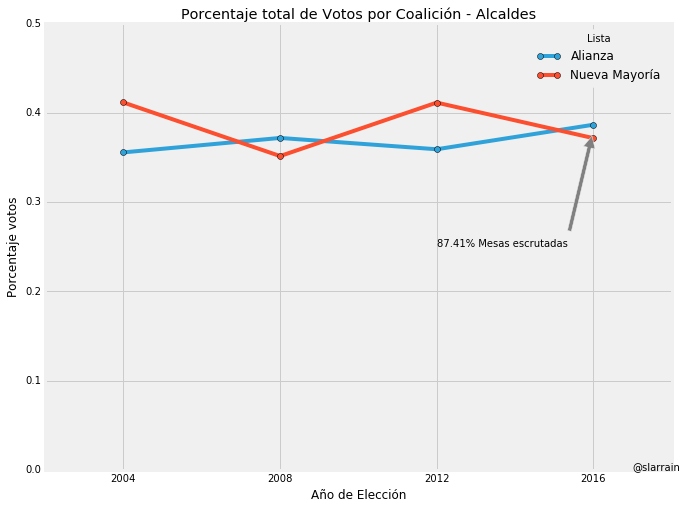

In [320]:
ax = graph_porcentaje_alcalde_coalicion_nuevo(df)

In [321]:
ax.get_figure().savefig("coalicion_2016_87.png")

In [319]:
def graph_porcentaje_alcalde_coalicion_nuevo(a):
    alianza = a.pivot(index="Año de Elección", columns="Lista", values="Votos Totales")
    title = "Porcentaje total de Votos por Coalición - Alcaldes"
    xlim = [2002, 2018]
    ylim = [0, 0.5]
    ylabel = "Porcentaje votos"
    copyr = 0
    plt.figure()
    ax = alianza.plot(xticks=[2004, 2008, 2012, 2016], title=title,
                xlim=xlim, ylim=ylim, marker="o")
    ax.text(2017,copyr,"@slarrain")
    ax.set(ylabel=ylabel)
    ax.annotate("87.41% Mesas escrutadas", xy=(2016, 0.38), xytext=(2012, 0.25), arrowprops=dict(facecolor='gray', shrink=0.05))
    return ax

In [296]:
ax.annotate("20.25% Mesas escrutadas", xy=(2016, 0.38), xytext=(2013, 0.25), arrowprops=dict(facecolor='black', shrink=0.05))

In [318]:
df.loc[7, "Votos Totales"] = 0.3715
df.loc[6, "Votos Totales"] = 0.3865

In [325]:
alc = process_todos_alcaldes()

In [326]:
alc

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,188629,1382185,404281,192858,744680,881816,1228808
2008,157414,1143898,442498,152138,594186,841431,1275653
2012,74997,915035,362649,182592,547313,655367,997036


In [329]:
alc.loc[2016, :] = [77184,561041,270640,147242,380298,601126,702517]

In [330]:
alc

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,188629.0,1382185.0,404281.0,192858.0,744680.0,881816.0,1228808.0
2008,157414.0,1143898.0,442498.0,152138.0,594186.0,841431.0,1275653.0
2012,74997.0,915035.0,362649.0,182592.0,547313.0,655367.0,997036.0
2016,77184.0,561041.0,270640.0,147242.0,380298.0,601126.0,702517.0


In [338]:
plt.style.use('ggplot')

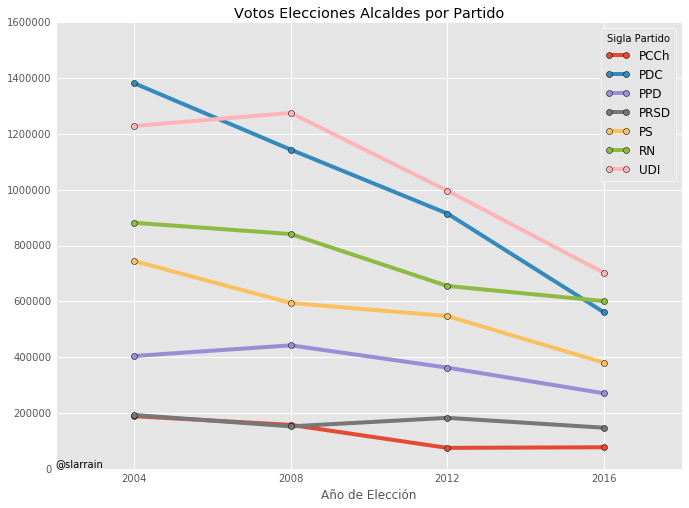

In [339]:
plt.figure()
ax = alc.plot(xticks=[2004, 2008, 2012, 2016], title="Votos Elecciones Alcaldes por Partido", marker="o",
                  xlim=[2002, 2018], ylim=[0, 1600000])
#ax.set_prop_cycle('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
ax.text(2002,10000,"@slarrain")

In [340]:
ax.get_figure().savefig("votos_alcaldes_partidos.png")

In [ ]:
### Porcentajes para alcaldes todos los partidos.

In [379]:
    #Read DF
    alcaldes = pd.read_excel("Resultados_Elecciones_Alcaldes_2004_al_2012.xlsx")
    #Select only votos por partido en cada eleccion
    alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum() / alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum() 
    alc_ano = alc_ano.reset_index()
    alc_ano.loc[:, "Sigla Partido"].replace(to_replace="[\.]", value="", regex=True, inplace=True)
    alc_ano.replace(to_replace="PCCH", value="PCCh", inplace=True)
    
    alcaldes_grandes = alc_ano[alc_ano["Sigla Partido"].isin(["RN", "UDI", "PDC", "PPD", "PRSD", "PS", "PCCh"])]
    
    alc = alcaldes_grandes.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")

In [380]:
alc

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,0.027446,0.201113,0.058824,0.028062,0.108354,0.128307,0.178796
2008,0.022620,0.164376,0.063586,0.021862,0.085384,0.120912,0.183309
2012,0.012951,0.158012,0.062624,0.031531,0.094512,0.113172,0.172172


In [381]:
alc.loc[2016, :] = [0.0162,0.118,0.0569,0.031,0.08,0.1265,0.1468]

In [382]:
alc

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,0.027446,0.201113,0.058824,0.028062,0.108354,0.128307,0.178796
2008,0.022620,0.164376,0.063586,0.021862,0.085384,0.120912,0.183309
2012,0.012951,0.158012,0.062624,0.031531,0.094512,0.113172,0.172172
2016,0.016200,0.118000,0.056900,0.031000,0.080000,0.126500,0.146800


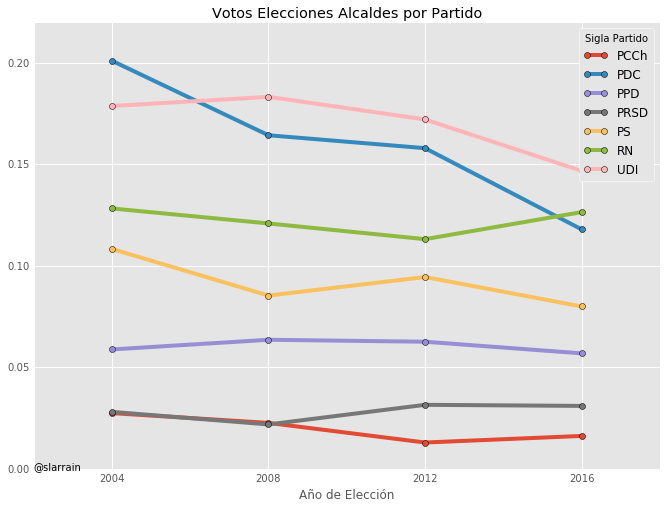

In [386]:
plt.figure()
ax = alc.plot(xticks=[2004, 2008, 2012, 2016], title="Votos Elecciones Alcaldes por Partido", marker="o",
                  xlim=[2002, 2018], ylim=[0, 0.22], table=False)
#ax.set_prop_cycle('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
ax.text(2002,0,"@slarrain")

In [387]:
ax.get_figure().savefig("porcentaje_alcaldes_partidos.png")

In [341]:
participacion16 = pd.read_csv("2016_participacion.csv")

In [342]:
participacion16

,Comuna,Total Mesas,Total Electores,Total Votación,% Participación
0,ALHUE,20,5813,3103,53.38
1,BUIN,189,64927,27253,41.97
2,CALERA DE TANGO,62,20910,10120,48.40
3,CERRILLOS,205,67584,22292,32.98
4,CERRO NAVIA,347,116423,36337,31.21
5,COLINA,219,74843,24234,32.38
6,CONCHALI,387,121265,31416,25.91
7,CURACAVI,69,23570,11377,48.27
8,EL BOSQUE,413,139195,32635,23.45
9,EL MONTE,74,25688,11823,46.03


In [347]:
participacion12 = pd.read_csv("2012_participacion_santiago.csv", thousands='.')

In [353]:
participacion12.loc[:, "COMUNA"].replace("R.M. ", "", regex=True, inplace=True)

In [355]:
participacion12 = participacion12.loc[:, ["COMUNA", "INSCRITOS.2"]]

In [356]:
participacion12

,COMUNA,INSCRITOS.2
0,PADRE HURTADO,33556
1,SAN PEDRO,7345
2,HUECHURABA,60752
3,QUILICURA,110589
4,RENCA,109142
5,QUINTA NORMAL,98584
6,PUDAHUEL,148053
7,CERRO NAVIA,115602
8,LO PRADO,88761
9,MAIPU,336451


In [363]:
df2 = alcaldes.groupby(["Año de Elección", "Id Región", "Comuna"], as_index=False)["Votos Totales"].sum()

In [369]:
df3 = df2.loc[(df2["Año de Elección"]==2012) & (df2["Id Región"]==13), ["Comuna", "Votos Totales"]]

In [373]:
df3.head()

,Comuna,Votos Totales
967,ALHUE,3218
968,BUIN,29521
969,CALERA DE TANGO,10508
970,CERRILLOS,24616
971,CERRO NAVIA,47411


In [372]:
import clcomuna

In [378]:
df3.Comuna.apply(clcomuna.get_steps)

Could not find code for:  TIL-TIL


967     13502
968     13402
969     13403
970     13102
971     13103
972     13301
973     13104
974     13503
975     13105
976     13602
977     13106
978     13107
979     13108
980     13603
981     13109
982     13110
983     13111
984     13112
985     13113
986     13302
987     13114
988     13115
989     13116
990     13117
991     13118
992     13119
993     13504
994     13501
995     13604
996     13404
997     13121
998     13605
999     13122
1000    13202
1001    13123
1002    13124
1003    13201
1004    13125
1005    13126
1006    13127
1007    13128
1008    13401
1009    13129
1010    13203
1011    13130
1012    13505
1013    13131
1014    13101
1015    13601
1016    13303
1017    13132
1018    13120
Name: Comuna, dtype: object

In [ ]:
pd.read

In [358]:
alcaldes.columns

Index(['Tipo de Elección', 'Cargo', 'Fecha de Elección', 'Año de Elección',
       'Inicio de Período', 'Fin de Período', 'Período', 'Id Región', 'Región',
       'Circunscripción Senatorial', 'Distrito', 'Comuna',
       'Circunscripción Electoral', 'Nombre Circunscripción Electoral',
       'Sexo Mesa', 'Candidato (a)', 'Nombres', 'Apellido Paterno',
       'Apellido Materno', 'Sexo', 'Electo', 'Partido', 'Sigla Partido',
       'Lista', 'Votos Totales'],
      dtype='object')

In [ ]:
#Concejales partidos

In [ ]:
    #Read DF
    alcaldes = pd.read_excel("resultados_elecciones_concejales_2004_al_2012.xlsx")
    #Select only votos por partido en cada eleccion
    
    if porcentaje:
        alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum() / alcaldes.groupby(["Año de Elección"])['Votos Totales'].sum()
    else:
        alc_ano = alcaldes.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    alc_ano = alc_ano.reset_index()

    alc_ano.loc[:, "Sigla Partido"].replace(to_replace="[\.]", value="", regex=True, inplace=True)
    alc_ano.replace(to_replace="PCCH", value="PCCh", inplace=True)
    
    alcaldes_grandes = alc_ano[alc_ano["Sigla Partido"].isin(["RN", "UDI", "PDC", "PPD", "PRSD", "PS", "PCCh"])]
    
    alianza_ = alianza_alc.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    alianza_ = alianza_.reset_index()
    
    #Pivot!
    alianza = alianza_.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")
    
    
    
    

In [498]:
def process_concejales_partidos(df, porcentaje=False):
    #df = pd.read_excel("resultados_elecciones_concejales_2004_al_2012.xlsx")
    df2 = df.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    df2 = df2.reset_index()
    #Arreglar nombres con puntos
    df2.loc[:, "Sigla Partido"].replace(to_replace="[\.]", value="", regex=True, inplace=True)
    #PC con 2 nombres
    df2.replace(to_replace="PCCH", value="PCCh", inplace=True)
    df3 = df2[df2["Sigla Partido"].isin(["RN", "UDI", "PDC", "PPD", "PRSD", "PS", "PCCh"])]
    
    if porcentaje:
        df4 = df3.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum() / df.groupby(["Año de Elección"])['Votos Totales'].sum()
    else:
        df4 = df3.groupby(["Año de Elección", "Sigla Partido"])['Votos Totales'].sum()
    df4 = df4.reset_index()
    df5 = df4.pivot(index="Año de Elección", columns="Sigla Partido", values="Votos Totales")
    return df5

def graph_concejales(df, title="Votos Elecciones Concejales por Partido", ylim=[200000, 1300000], name=200000):
    plt.figure()
    ax = df.plot(xticks=[2004, 2008, 2012, 2016], title=title, marker="o",
                  xlim=[2002, 2018], ylim=ylim, table=False)
    #ax.set_prop_cycle('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
    ax.text(2002,name,"@slarrain")
    return ax

In [ ]:
df.head(20)

In [395]:
b = (concejales.groupby(["Año de Elección", "Lista"])["Partido"].unique())

In [407]:
b = b.reset_index()

In [410]:
b.loc[2,"Partido"]

array(['INDEPENDIENTE', 'UNION DEMOCRATA INDEPENDIENTE',
       'RENOVACION NACIONAL'], dtype=object)

In [413]:
b.loc[3,"Partido"]

array(['DEMOCRATA CRISTIANO', 'POR LA DEMOCRACIA', 'SOCIALISTA DE CHILE',
       'RADICAL SOCIALDEMOCRATA', 'INDEPENDIENTE'], dtype=object)

In [414]:
b.loc[10,"Partido"]

array(['DEMOCRATA CRISTIANO', 'SOCIALISTA DE CHILE', 'INDEPENDIENTE'], dtype=object)

In [415]:
b.loc[14,"Partido"]

array(['POR LA DEMOCRACIA', 'RADICAL SOCIALDEMOCRATA', 'INDEPENDIENTE'], dtype=object)

In [416]:
b.loc[13,"Partido"]

array(['RENOVACION NACIONAL', 'UNION DEMOCRATA INDEPENDIENTE',
       'INDEPENDIENTE'], dtype=object)

In [417]:
b.loc[21,"Partido"]

array(['INDEPENDIENTE', 'CHILEPRIMERO', 'UNION DEMOCRATA INDEPENDIENTE',
       'COMUNISTA DE CHILE'], dtype=object)

In [418]:
b.loc[17,"Partido"]

array(['INDEPENDIENTE', 'PARTIDO IGUALDAD', 'COMUNISTA DE CHILE',
       'REGIONALISTA DE LOS INDEPENDIENTES'], dtype=object)

In [419]:
b.loc[18,"Partido"]

array(['PARTIDO REGIONALISTA DE LOS INDEPENDIENTES', 'INDEPENDIENTE'], dtype=object)

In [420]:
b.loc[22,"Partido"]

array(['PARTIDO POR LA DEMOCRACIA', 'INDEPENDIENTE',
       'PARTIDO RADICAL SOCIALDEMOCRATA', 'PARTIDO COMUNISTA DE CHILE',
       'RENOVACION NACIONAL', 'UNION DEMOCRATA INDEPENDIENTE',
       'PARTIDO IZQUIERDA CRISTIANA DE CHILE'], dtype=object)

In [472]:
total = 4752686

In [499]:
df_porcentajes = process_concejales_partidos(concejales, True)

In [507]:
df_porcentajes

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,0.043514,0.181391,0.088824,0.040428,0.097051,0.134381,0.167560
2008,0.044024,0.122252,0.074451,0.045605,0.097832,0.141024,0.132331
2012,0.049505,0.120457,0.071028,0.037616,0.096479,0.121486,0.127250
2016,0.052076,0.122109,0.084499,0.071020,0.102540,0.168884,0.153760


In [489]:
df_porcentajes

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,0.057776,0.240844,0.117936,0.053679,0.128861,0.178426,0.222479
2008,0.066955,0.185930,0.113230,0.069359,0.148790,0.214479,0.201258
2012,0.079357,0.193095,0.113860,0.060300,0.154659,0.194745,0.203985
2016,0.052076,0.122109,0.084499,0.071020,0.102540,0.168884,0.153760


In [506]:
df_porcentajes.loc[2016, :] = df5.loc[2016,:]/total #5658 - 5592 - 5585 - 5601 - 5600

In [483]:
(df5.loc[2016,:]/total).sum()

0.75488913006245317

In [479]:
df_porcentajes

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,0.057776,0.240844,0.117936,0.053679,0.128861,0.178426,0.222479
2008,0.066955,0.185930,0.113230,0.069359,0.148790,0.214479,0.201258
2012,0.079357,0.193095,0.113860,0.060300,0.154659,0.194745,0.203985
2016,0.062930,0.262330,0.128458,0.058468,0.140357,0.194344,0.242327


In [423]:
df5 = process_concejales_partidos(concejales)

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,299086,1246772,610519,277878,667071,923655,1151703
2008,305990,849714,517469,316975,679982,980189,919765
2012,285680,695127,409886,217074,556760,701067,734330


In [501]:
df5 = process_concejales_partidos(concejales)

In [505]:
df5

Sigla Partido,PCCh,PDC,PPD,PRSD,PS,RN,UDI
Año de Elección,,,,,,,
2004,299086.0,1246772.0,610519.0,277878.0,667071.0,923655.0,1151703.0
2008,305990.0,849714.0,517469.0,316975.0,679982.0,980189.0,919765.0
2012,285680.0,695127.0,409886.0,217074.0,556760.0,701067.0,734330.0
2016,247501.0,580347.0,401598.0,337538.0,487339.0,802654.0,730774.0


In [504]:
df5.loc[2016, :] = [247501, 580347, 401598, 337538, 487339, 802654, 730774]

In [495]:
df5.loc[2012,:]/5770760

Sigla Partido
PCCh    0.049505
PDC     0.120457
PPD     0.071028
PRSD    0.037616
PS      0.096479
RN      0.121486
UDI     0.127250
Name: 2012, dtype: float64

In [491]:
concejales.groupby(["Año de Elección"])["Votos Totales"].sum()

Año de Elección
2004    6873385
2008    6950491
2012    5770760
Name: Votos Totales, dtype: int64

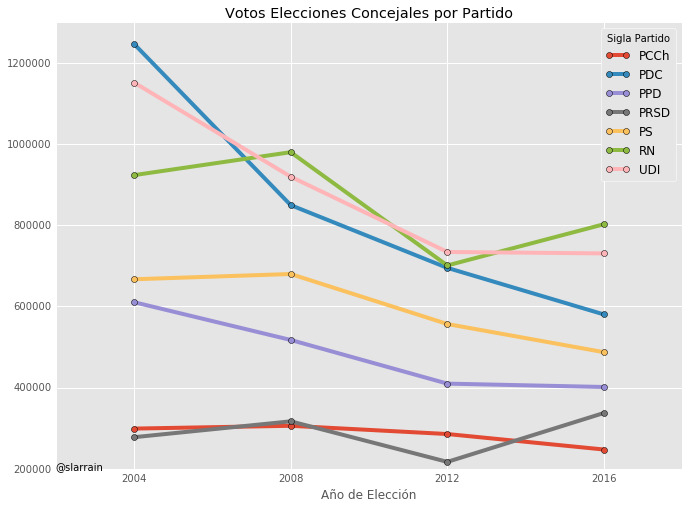

In [446]:
ax = graph_concejales(df5)

In [448]:
ax.get_figure().savefig("votos_concejales_partidos.png")

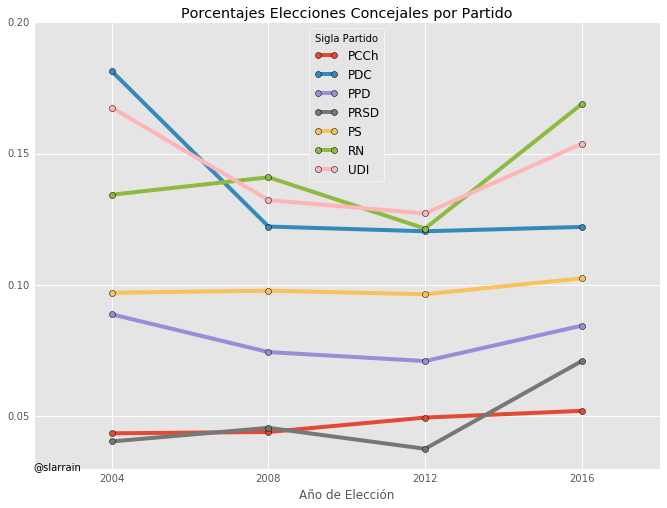

In [509]:
ax2 = graph_concejales(df_porcentajes, title="Porcentajes Elecciones Concejales por Partido", ylim=[0.03, 0.20], name=0.03)

In [510]:
ax2.get_figure().savefig("porcentaje_concejales_partidos.png")

In [451]:
part16 = pd.read_csv("2016_participacion.csv", )

In [452]:
part16

,Comuna,Total Mesas,Total Electores,Total Votación,% Participación
0,ALHUE,20,5813,3103,53.38
1,BUIN,189,64927,27253,41.97
2,CALERA DE TANGO,62,20910,10120,48.40
3,CERRILLOS,205,67584,22292,32.98
4,CERRO NAVIA,347,116423,36337,31.21
5,COLINA,219,74843,24234,32.38
6,CONCHALI,387,121265,31416,25.91
7,CURACAVI,69,23570,11377,48.27
8,EL BOSQUE,413,139195,32635,23.45
9,EL MONTE,74,25688,11823,46.03


In [458]:
pobreza = pd.read_csv("pobreza_2013_comunas.csv")

In [460]:
len(pobreza)

345

In [461]:
len(part16)

52

In [462]:
jorge = pd.read_excel("participacion y casen.xlsx")

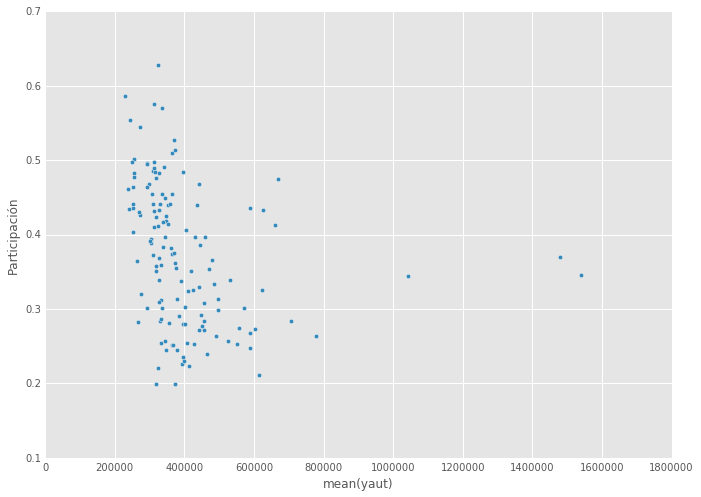

In [468]:
jorge[["mean(yaut)", "Participación"]].plot.scatter("mean(yaut)", "Participación")

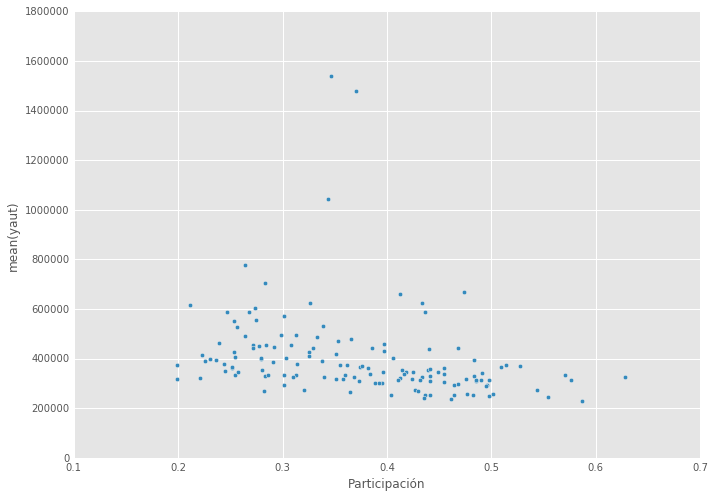

In [471]:
jorge.plot.scatter("Participación", "mean(yaut)", )

Regresion

Analisis de la relacion entre participacion y desempleo controlando por otras variables:
- ruralidad
- 